In [1]:
import numpy as np
from itertools import cycle

In [2]:
with open("input", "r") as f:
    jet_pattern = f.read().strip()

In [3]:
shapes = []
shapes.append([[1, 1, 1, 1]])
shapes.append([[0, 1, 0],
               [1, 1, 1],
               [0, 1, 0]])
shapes.append([[1, 1, 1],
               [0, 0, 1],
               [0, 0, 1]])
shapes.append([[1],
               [1],
               [1],
               [1]])
shapes.append([[1, 1],
               [1, 1]])

In [4]:
shapes = [np.array(shape, dtype=int) for shape in shapes]

In [5]:
def fits_in(field, shape, x, y):
    return np.all((field[y: y + shape.shape[0],
                         x: x + shape.shape[1]] + shape) < 2)  

In [6]:
heights = []

shape_gen = cycle(shapes)
jet_gen = cycle(jet_pattern)

min_x, max_x = 0, 7

field = np.zeros((min_x, max_x), dtype=int)

for _ in range(5_000):

    shape = next(shape_gen)    
    field = np.vstack((field, np.zeros((shape.shape[0] + 3, max_x), dtype=int)))
    
    max_y = field.shape[0] - shape.shape[0]
    x, y = 2, field.shape[0] - shape.shape[0]
    
    for i in range(max_y, -1, -1):
        jet = next(jet_gen)
        if (jet == '>'
            and x + shape.shape[1] < max_x
            and fits_in(field, shape, x + 1, i)):
            x += 1
            
        elif (jet == '<'
              and x > min_x
              and fits_in(field, shape, x - 1, i)):
            x -= 1
        
        if i >= 1 and not fits_in(field, shape, x, i - 1):
            break
        
        if i >= 1:
            y -= 1
            
    field[y: y + shape.shape[0], x: x + shape.shape[1]] += shape
    field = field[~np.all(field == 0, axis=1)]
    heights.append(field.shape[0])

### Part 1

In [7]:
heights[2022 - 1]

3130

### Part 2

In [8]:
first_approx = (heights[-1] - heights[0]) / len(heights)

norm_heights = [height - first_approx * i for i, height in enumerate(heights)]

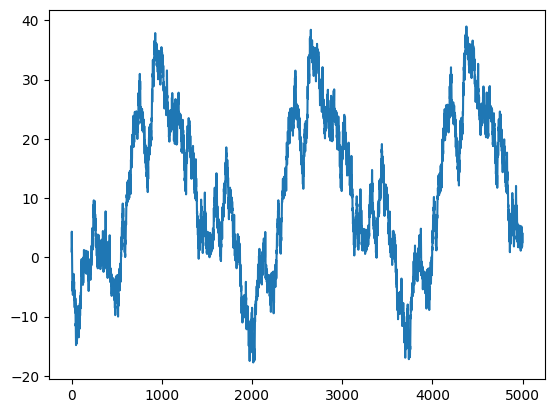

In [9]:
import matplotlib.pyplot as plt

plt.plot(norm_heights)

In [10]:
total_moves = 1000000000000

first_max_idx = norm_heights.index(max(norm_heights[:2000]))
second_max_idx = norm_heights.index(max(norm_heights[2000:4000]))

period = second_max_idx - first_max_idx
gain_per_period = heights[second_max_idx] - heights[first_max_idx]

n_periods = total_moves // period
remainder = heights[total_moves % period - 1]

n_periods * gain_per_period + remainder

1556521739139